### Number of Tasks


1. Develop Your First XGBoost Model in Python with scikit-learn
1. Data Preparation for Gradient Boosting
1. How to Evaluate XGBoost Models
1. Visualize Individual Trees Within A Model
1. Save and Load Trained XGBoost Models
2. Feature Importance With XGBoost and Feature Selection

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
import pickle
from sklearn.externals import joblib
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel


### Reading Dataset

In [83]:
titanic = pd.read_csv('/home/hasan/DATA SET/titanic dataset/train.csv')

### Summarize the dataset

In [84]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
titanic.shape


(891, 12)

In [86]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [87]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
# total number of every species
titanic.groupby('Sex')['Sex'].agg(['count']).rename(columns={'count':'Total_number'}).sort_values(by='Total_number', ascending=False)

,Total_number
Sex,
male,577
female,314


### Data Visualization

##### Univariate plots

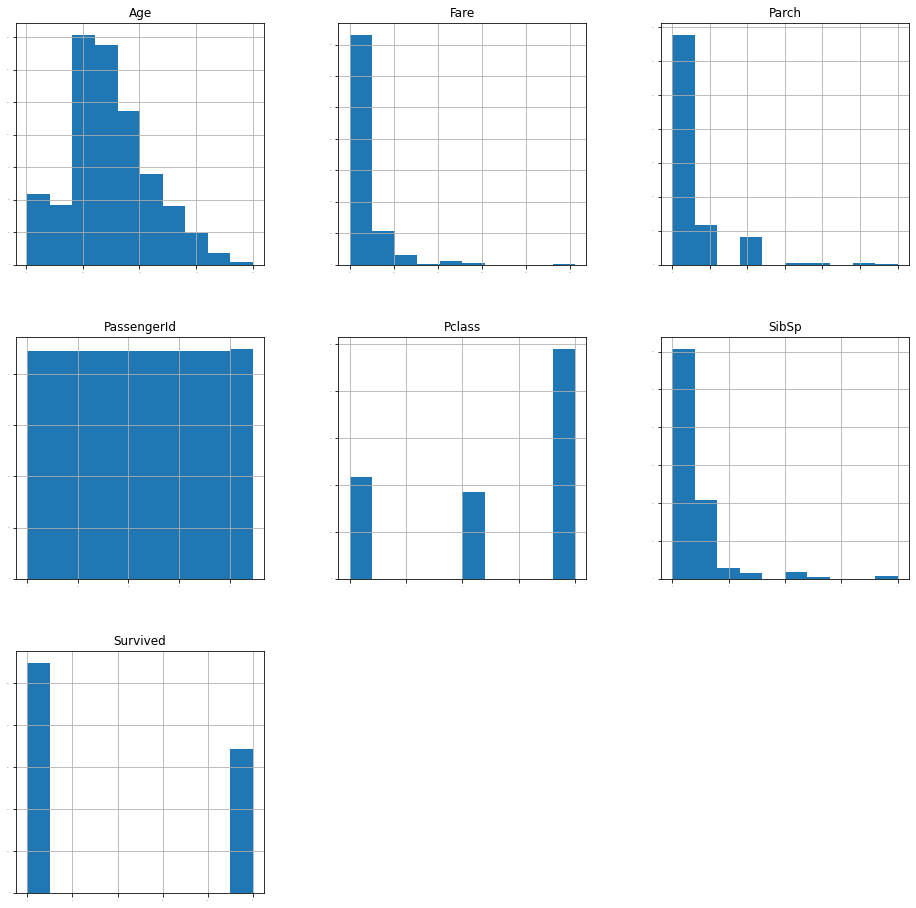

In [89]:
# histograms
titanic.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(16,16))
plt.show()

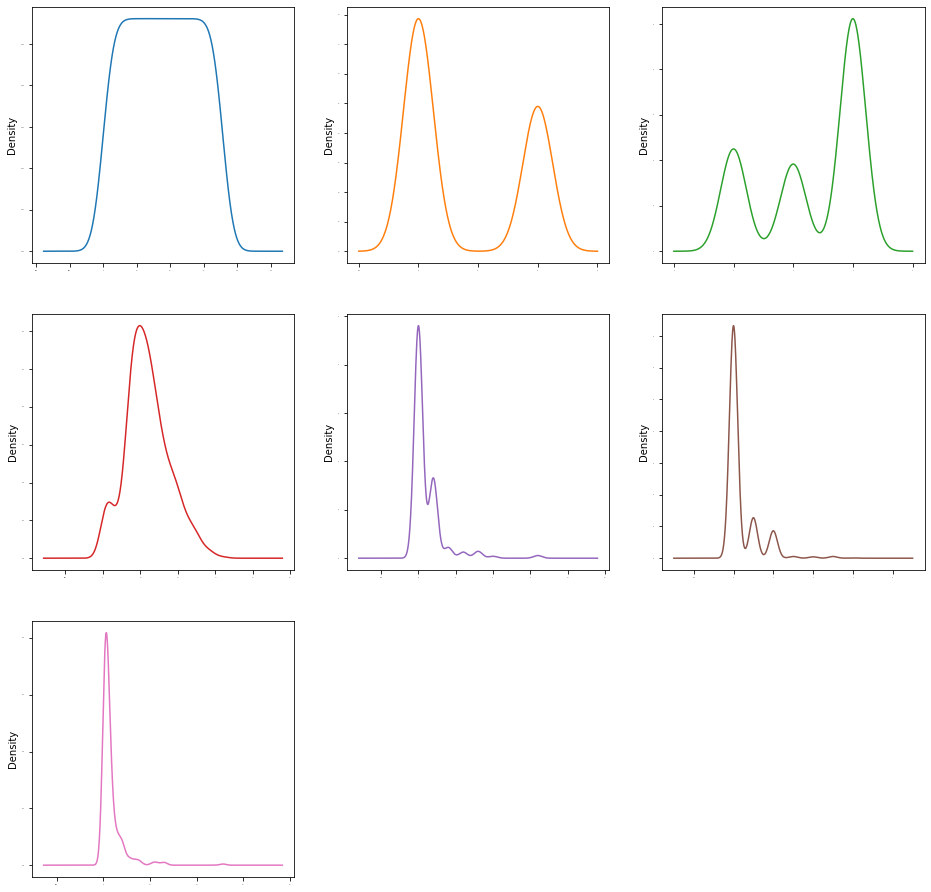

In [90]:
# density
titanic.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False, fontsize=1, figsize=(16,16))
plt.show()

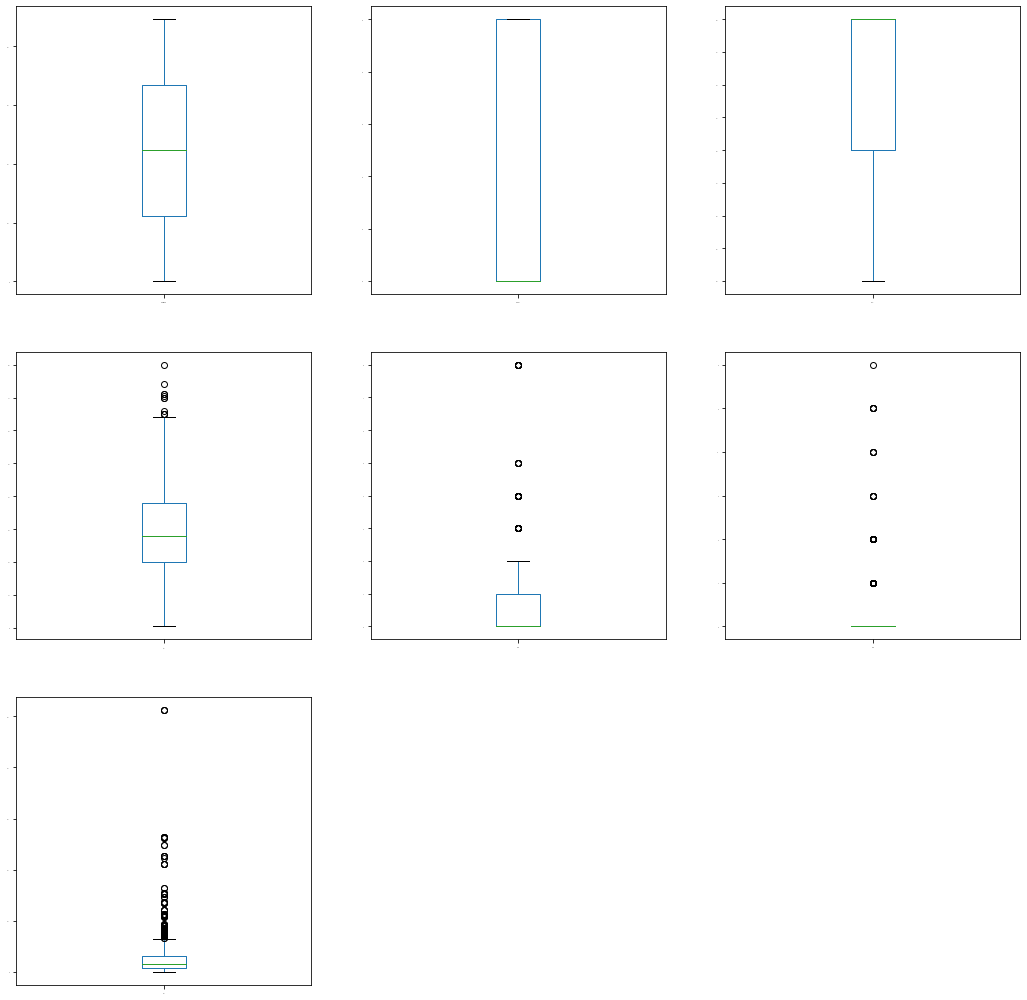

In [91]:
# box and whisker plots
titanic.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=1, figsize=(18,18))
plt.show()

##### Multivariate plots

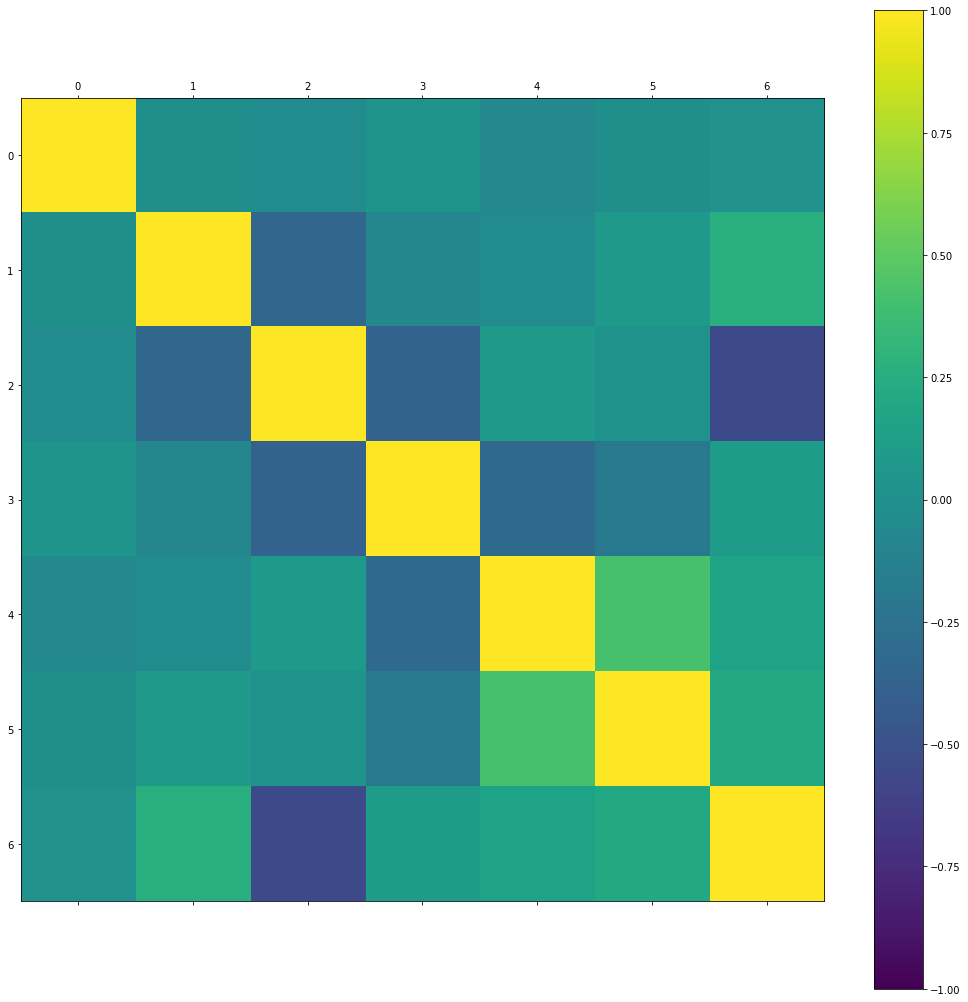

In [92]:
# correlation matrix
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(titanic.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


### Dropping Unnecessary columns

In [93]:
titanic.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [94]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


### Dropping nan data

In [95]:
titanic.dropna(axis=0, inplace=True)

In [96]:
titanic.shape

(712, 9)

### Unique data in column

In [97]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [98]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

### Categorical and Numerical columns

In [99]:
#categorical column
titanic.loc[:,titanic.dtypes==np.object].head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [100]:
#numerical column int type
titanic.loc[:,titanic.dtypes==np.int].head()

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0


In [101]:
#numerical column float
titanic.loc[:,titanic.dtypes==np.float].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


### Encoding

In [102]:
titanic = pd.get_dummies(titanic)

In [103]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Feature and Label data

In [135]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

### Dividing dataset

In [137]:
seed = 7
test_size = 0.33
Xtrain, xtest, Ytrain, ytest = train_test_split(X, y, test_size=test_size,random_state=seed)

### Model

In [138]:
model = XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Saving and Loading Model with pickle

In [140]:
# save model to file
pickle.dump(model, open("titanic.pickle.dat", "wb"))


In [ ]:
# Load model
loaded_model = pickle.load(open("titanic.pickle.dat", "rb"))

### Saving and Loading Model with Joblib

In [148]:
# save model to file
joblib.dump(model, "titanic.joblib.dat")

['titanic.joblib.dat']

In [149]:
# load model from file
loaded_model = joblib.load("titanic.joblib.dat")

### Predict

In [142]:
predictions = loaded_model.predict(xtest)

### Accuracy

In [144]:
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 78.72%


### Model with CV

In [125]:
model = XGBClassifier()


In [126]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Accuracy: 78.09% (4.43%)


##### Plot model

In [150]:
model = XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

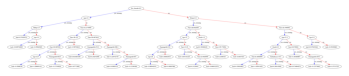

In [133]:
plot_tree(model, num_trees=4)
plt.show()

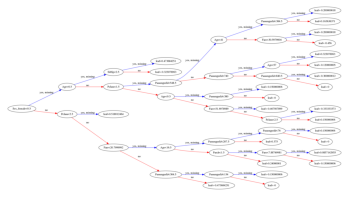

In [134]:
plot_tree(model, num_trees=0, rankdir='LR')

### Feature Importance

In [151]:
# feature importance
print(model.feature_importances_)

[0.02942305 0.2088871  0.03723339 0.07762934 0.03242932 0.03096772
 0.51069635 0.         0.02606436 0.01248748 0.03418198]


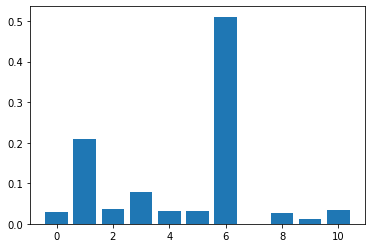

In [153]:
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

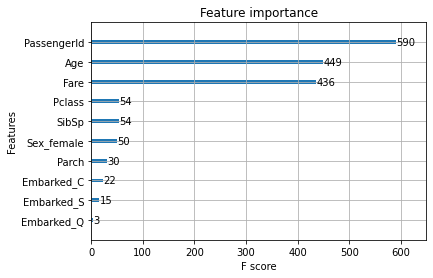

In [156]:
#Built-in XGBoost Feature Importance Plot
plot_importance(model)
plt.show()

### Feature Selection

##### Feature Selection with XGBoost Feature Importance Scores

In [161]:
model = XGBClassifier()
model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [162]:
thresholds = np.sort(model.feature_importances_)
for thresh in thresholds:
    
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
    accuracy*100.0))

Thresh=0.000, n=11, Accuracy: 78.72%
Thresh=0.000, n=11, Accuracy: 78.72%
Thresh=0.029, n=9, Accuracy: 78.72%
Thresh=0.034, n=8, Accuracy: 78.72%
Thresh=0.037, n=7, Accuracy: 81.28%
Thresh=0.040, n=6, Accuracy: 81.70%
Thresh=0.042, n=5, Accuracy: 80.43%
Thresh=0.056, n=4, Accuracy: 76.17%
Thresh=0.061, n=3, Accuracy: 80.00%
Thresh=0.171, n=2, Accuracy: 78.72%
Thresh=0.530, n=1, Accuracy: 77.87%
